# Bone Marrow Transplant Data Analysis (pt. 1)

## Loading the dataset

In [1]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff("../data/bone-marrow.arff")

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


## Checking for missing values

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Recipientgender         0
Stemcellsource          0
Donorage                0
Donorage35              0
IIIV                    0
Gendermatch             0
DonorABO                0
RecipientABO            0
RecipientRh             0
ABOmatch                0
CMVstatus               0
DonorCMV                0
RecipientCMV            0
Disease                 0
Riskgroup               0
Txpostrelapse           0
Diseasegroup            0
HLAmatch                0
HLAmismatch             0
Antigen                 0
Alel                    0
HLAgrI                  0
Recipientage            0
Recipientage10          0
Recipientageint         0
Relapse                 0
aGvHDIIIIV              0
extcGvHD                0
CD34kgx10d6             0
CD3dCD34                5
CD3dkgx10d8             5
Rbodymass               2
ANCrecovery             0
PLTrecovery             0
time_to_aGvHD_III_IV    0
survival_time           0
survival_status         0
dtype: 

## Visualizing the missing values

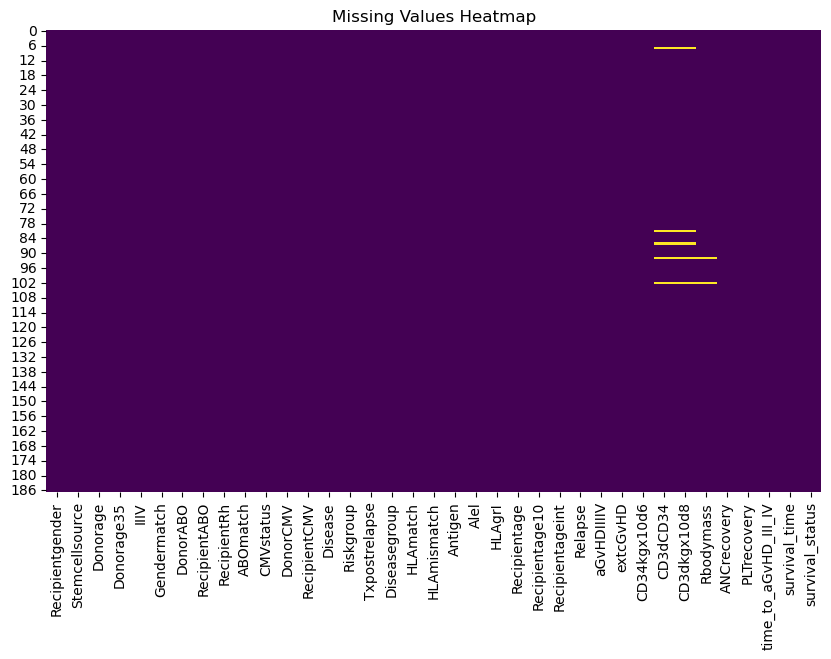

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Handling Missing Values: Mean Imputation Strategy

### Why Choose Mean Imputation?

1. **Data Preservation**
   - Small proportion of missing values (<5% per column)
   - Deleting rows would reduce our already limited dataset
   - Removing columns would lose potentially valuable predictors

2. **Statistical Considerations**
   - Mean provides a reasonable central tendency estimate
   - Maintains the overall data distribution
   - Minimizes impact on variance compared to deletion



4. **Alternative Methods Considered**
   - Row deletion: Too costly given sample size
   - Column deletion: Would lose important features

This approach balances data preservation with statistical validity while maintaining clinical relevance.

In [5]:
# Fill missing values with the mean of each numeric column
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Check for remaining missing values
missing_values = df.isnull().sum()
print("Missing values in each column after handling:")
print(missing_values)


Missing values in each column after handling:
Recipientgender         0
Stemcellsource          0
Donorage                0
Donorage35              0
IIIV                    0
Gendermatch             0
DonorABO                0
RecipientABO            0
RecipientRh             0
ABOmatch                0
CMVstatus               0
DonorCMV                0
RecipientCMV            0
Disease                 0
Riskgroup               0
Txpostrelapse           0
Diseasegroup            0
HLAmatch                0
HLAmismatch             0
Antigen                 0
Alel                    0
HLAgrI                  0
Recipientage            0
Recipientage10          0
Recipientageint         0
Relapse                 0
aGvHDIIIIV              0
extcGvHD                0
CD34kgx10d6             0
CD3dCD34                0
CD3dkgx10d8             0
Rbodymass               0
ANCrecovery             0
PLTrecovery             0
time_to_aGvHD_III_IV    0
survival_time           0
survival_status   

There are no missing values left in the dataset.


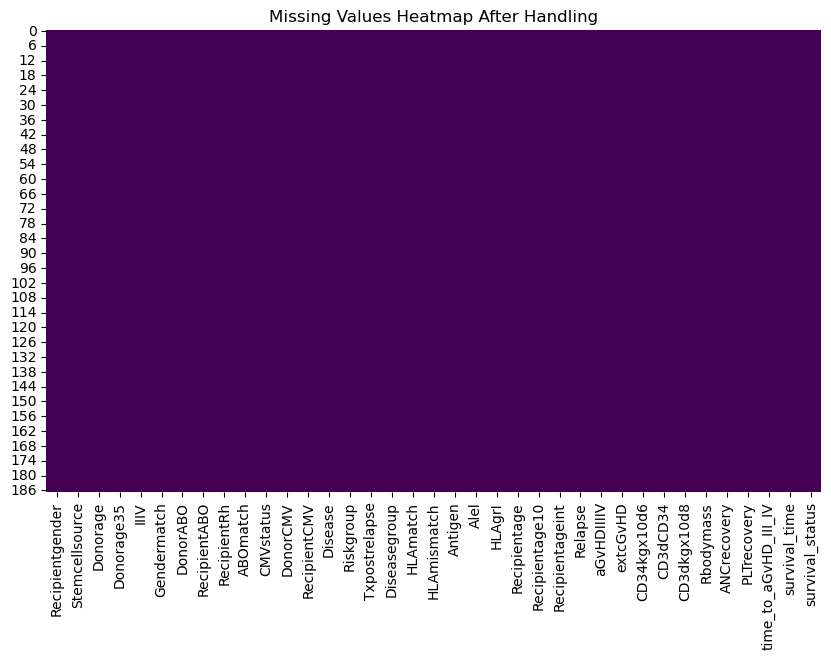

In [6]:

# Verify that there are no more missing values
if missing_values.sum() == 0:
    print("There are no missing values left in the dataset.")
else:
    print("There are still missing values in the dataset.")

# Visualize missing values
plt.figure(figsize=(10, 6))

heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
cbar = heatmap.collections[0].colorbar

plt.title('Missing Values Heatmap After Handling')
plt.show()

# Store the handled data in a new variable
df_cleaned = df.copy()

# Checking for significant outliers

## Visualizing the data

<Figure size 1500x1000 with 0 Axes>

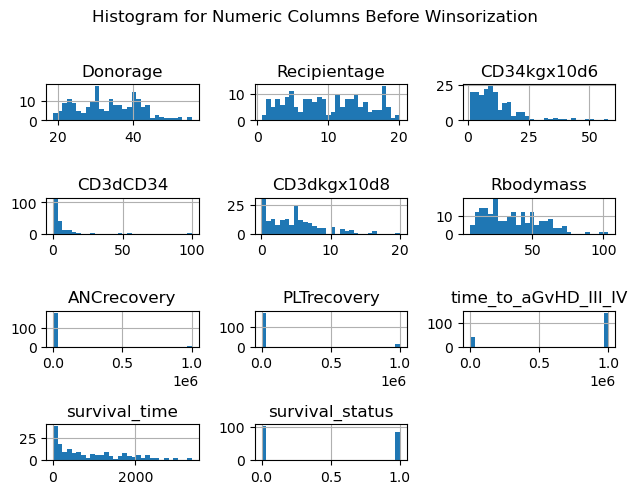

In [10]:


plt.figure(figsize=(15, 10))
df_cleaned[numeric_cols].hist(bins=30, layout=(len(numeric_cols) // 3 + 1, 3))
plt.suptitle('Histogram for Numeric Columns Before Winsorization', y=1.02)
plt.tight_layout()
plt.show()

## Apply Winsorization to cap extreme values

<Figure size 1500x1000 with 0 Axes>

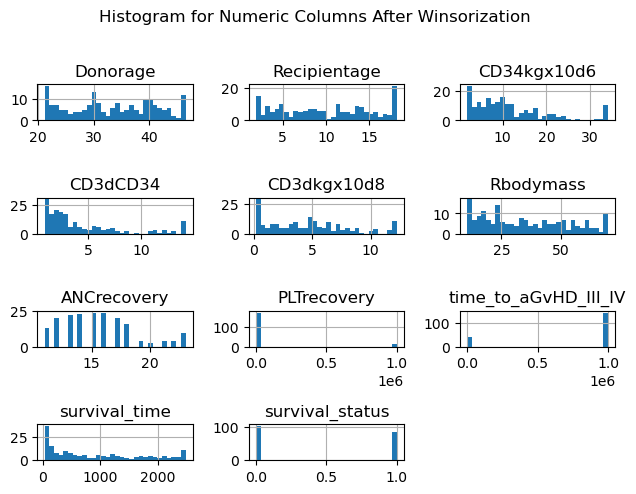

In [11]:
from scipy.stats.mstats import winsorize

df_winsorized = df_cleaned.copy()
for col in numeric_cols:
    df_winsorized[col] = winsorize(df_cleaned[col], limits=[0.05, 0.05])

# Visualize data after Winsorization


plt.figure(figsize=(15, 10))
df_winsorized[numeric_cols].hist(bins=30, layout=(len(numeric_cols) // 3 + 1, 3))
plt.suptitle('Histogram for Numeric Columns After Winsorization', y=1.02)
plt.tight_layout()
plt.show()

In [12]:
# Save the Winsorized data to a CSV file
df_winsorized.to_csv('../data/winsorized_data.csv', index=False)

print("Winsorized data has been exported to '../data/winsorized_data.csv'")

Winsorized data has been exported to '../data/winsorized_data.csv'
